# Decision Tree Classifier Model on Wine Data

We will use Sklearn module to implement decision tree algorithm. Sklearn uses CART(Classification And Regression Trees) algorithm and by deflault it uses Giny impurity as a criteria to split the nodes.

In [1]:
#importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data
data=pd.read_csv(r'C:\Users\joshi\Downloads\wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [3]:
#checking random sample
data.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
1331,7.8,0.870,0.26,3.8,0.107,31.0,67.0,0.99668,3.26,0.46,9.2,Low,5
841,6.6,0.660,0.00,3.0,0.115,21.0,31.0,0.99629,3.45,0.63,10.3,Medium,5
828,7.8,0.570,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,High,8
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,Medium,6
146,5.8,0.680,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0,Medium,5
670,6.9,0.400,0.24,2.5,0.083,30.0,45.0,0.99590,3.26,0.58,10.0,Medium,5
625,6.8,0.690,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.2,Medium,5
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,High,6
1014,8.0,0.580,0.16,2.0,0.120,3.0,7.0,0.99454,3.22,0.58,11.2,High,6
472,12.5,0.370,0.55,2.6,0.083,25.0,68.0,0.99950,3.15,0.82,10.4,Medium,6


In [4]:
#checking shape
data.shape

(1599, 13)

In [5]:
#checking nulls
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

As we have catagorical column (Alcohol Content), we need to convert it into numeric data using Encoding.

Content is following some order like low, mid and high. We need to give weight according to the order.

In [6]:
#Using Ordinal Encoder
ord_enc=OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df1=ord_enc.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

Override alcohol content column with codes.

In [7]:
data['Alcohol_content']=df1
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0,5


# Plotting Heatmap(Correlation Matrix)

Plotting Heatmap to visualize and find the coefficient of multicolinearity, so we can reduce the features.

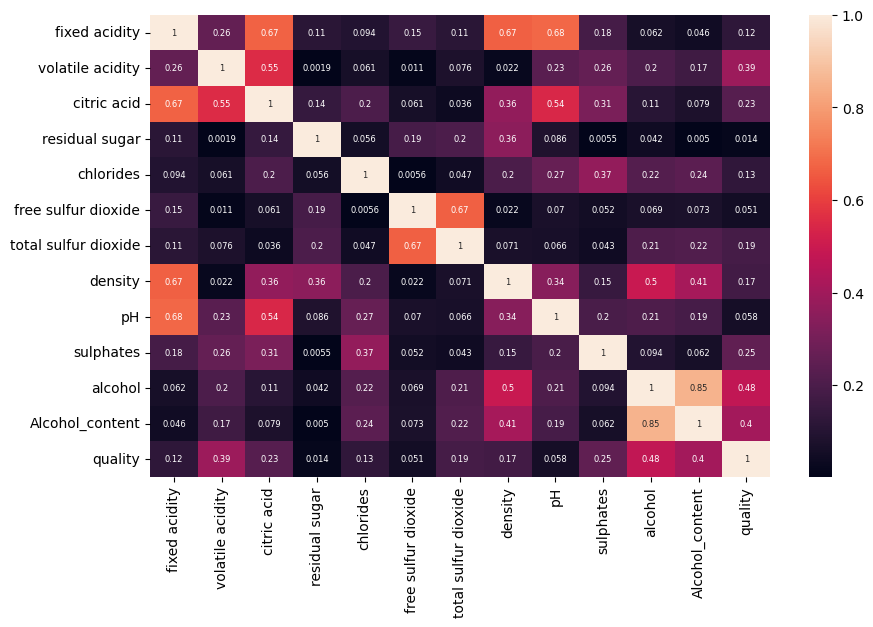

In [8]:
df_corr=data.corr().abs()
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, annot_kws={'size':6})
plt.show()

Seems like alcohol content and alcohol are correlated as per the above Heatmap.

Making sure if they are really correlated and following some trend.

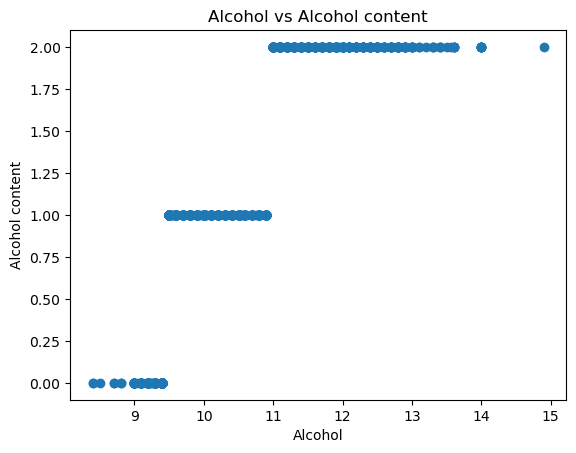

In [9]:
plt.scatter(data.alcohol, data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol content')
plt.title('Alcohol vs Alcohol content')
plt.show()

We can see a clear trend. As and when Alcohol level increases Alcohol content also increases. So we can delete one of them.

In [10]:
x=data.drop(columns=['quality', 'Alcohol_content'])
y=data['quality']

In [11]:
#train test split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=41)

In [12]:
#writing a function to call as many times to check the accuracy score on different models.
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"accuracy score (train result):{accuracy_score(y_train, y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print(f"accuracy score (test result):{accuracy_score(y_test, pred)*100:.2f}%")
        print("\nclassification report : \n \n", classification_report(y_test, pred, digits=2))    

In [13]:
#model initiation
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
#calling the function and passing the dataset to check the train and test scores
metric_score(clf, x_train, x_test, y_train, y_test, train=True) #this is for training score
metric_score(clf, x_train, x_test, y_train, y_test, train=False) #this is for testing score

accuracy score (train result):100.00%
accuracy score (test result):61.50%

classification report : 
 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.08      0.09      0.09        11
           5       0.68      0.68      0.68       157
           6       0.63      0.65      0.64       168
           7       0.56      0.51      0.53        57
           8       0.17      0.25      0.20         4

    accuracy                           0.61       400
   macro avg       0.35      0.36      0.36       400
weighted avg       0.62      0.61      0.62       400



Let's understand confusion matrix for multiclass.

In [15]:
#predicting and creating confusion matrix
y_pred=clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[  0,   0,   2,   0,   1,   0],
       [  1,   1,   6,   3,   0,   0],
       [  1,   6, 106,  40,   4,   0],
       [  0,   5,  33, 109,  17,   4],
       [  0,   0,   8,  19,  29,   1],
       [  0,   0,   1,   1,   1,   1]], dtype=int64)

In [16]:
#converting into dataframe to understand it better
pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Q3','Q4','Q5','Q6','Q7','Q8'], columns=['Q3','Q4','Q5','Q6','Q7','Q8'])

,Q3,Q4,Q5,Q6,Q7,Q8
Q3,0,0,2,0,1,0
Q4,1,1,6,3,0,0
Q5,1,6,106,40,4,0
Q6,0,5,33,109,17,4
Q7,0,0,8,19,29,1
Q8,0,0,1,1,1,1


Let's go ahead and try to improve our model by hyperparameter tuning.

In [17]:
#we are tuning four important hyperparameters right now, we are passing different values for both parameters
grid_param={'criterion':['gini', 'entropy'],
           'max_depth':range(12, 15), #the maximum depth of tree
           'min_samples_leaf':range(2, 4), #the minimum number of samples required
           'min_samples_split':range(3, 6), #the minimum number of samples required to split an internal node
           'max_leaf_nodes':range(30, 32)} #if none then unlimited number of leaf nodes

In [18]:
grid_search=GridSearchCV(estimator=clf, param_grid=grid_param, cv=5)

In [19]:
#fitting
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(12, 15),
                         'max_leaf_nodes': range(30, 32),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(3, 6)})

In [20]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [23]:
#initiating decision tree classifier with new parameters to train
clf=DecisionTreeClassifier(criterion='gini', max_depth=15, max_leaf_nodes=30, min_samples_leaf=3, min_samples_split=4)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=30, min_samples_leaf=3,
                       min_samples_split=4)

In [24]:
#calling the function again and passing the dataset to check the train and test scores
metric_score(clf, x_train, x_test, y_train, y_test, train=True) #this is for training score
metric_score(clf, x_train, x_test, y_train, y_test, train=False) #this is for testing score

accuracy score (train result):66.14%
accuracy score (test result):57.25%

classification report : 
 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.60      0.72      0.66       157
           6       0.56      0.45      0.50       168
           7       0.53      0.70      0.60        57
           8       0.00      0.00      0.00         4

    accuracy                           0.57       400
   macro avg       0.28      0.31      0.29       400
weighted avg       0.55      0.57      0.55       400



In [25]:
#tuning a little bit manually to increase accuracy
clf=DecisionTreeClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=50, min_samples_leaf=3, min_samples_split=4)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=50,
                       min_samples_leaf=3, min_samples_split=4)

In [26]:
#again calling the function
metric_score(clf, x_train, x_test, y_train, y_test, train=True) #this is for training score
metric_score(clf, x_train, x_test, y_train, y_test, train=False) #this is for testing score

accuracy score (train result):68.14%
accuracy score (test result):59.50%

classification report : 
 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.21      0.27      0.24        11
           5       0.61      0.74      0.67       157
           6       0.62      0.55      0.58       168
           7       0.55      0.47      0.51        57
           8       0.00      0.00      0.00         4

    accuracy                           0.59       400
   macro avg       0.33      0.34      0.33       400
weighted avg       0.59      0.59      0.59       400



You can always tune manually and increase the accuracy.

In [27]:
#again predicting and making dataframe of confusion matrix
y_pred=clf.predict(x_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Q3','Q4','Q5','Q6','Q7','Q8'], columns=['Q3','Q4','Q5','Q6','Q7','Q8'])

,Q3,Q4,Q5,Q6,Q7,Q8
Q3,0,0,3,0,0,0
Q4,0,3,6,2,0,0
Q5,0,6,116,29,6,0
Q6,0,5,57,92,14,0
Q7,0,0,7,23,27,0
Q8,0,0,0,2,2,0


And we're done here!